In [48]:
import numpy as np
import pandas as pd

In [49]:
samp=np.array([[2,3],[1,3],[5,7],[4,8],[2,4]])
samp

array([[2, 3],
       [1, 3],
       [5, 7],
       [4, 8],
       [2, 4]])

In [50]:
#Step 1: Choose the number of cluster K
k=2

In [51]:
#Step 2: Choose the intial centroid randomly (pick any two observation as initial centroid as k =2)
cent1=samp[0]  #cent1=samp[np.random.randint(5)]
cent2=samp[1]
cent1,cent2

(array([2, 3]), array([1, 3]))

In [52]:
#Step 3: Find the distance between each observation and centroids using eucledian distance
d1=np.sum((samp-cent1)**2,1)
d2=np.sum((samp-cent2)**2,1)
dist=np.vstack([d1,d2]).T
dist

array([[ 0,  1],
       [ 1,  0],
       [25, 32],
       [29, 34],
       [ 1,  2]], dtype=int32)

In [53]:
#Step 4: Cluster the observations based on minimum distance
pos=dist.argmin(axis=1)
clust1=samp[pos==0]
clust2=samp[pos==1]

In [54]:
#Step 5: Update the centroid for each culster by taking the mean of samples in each cluster
cent1=clust1.mean(axis=0)
cent2=clust2.mean(axis=0)
cent1,cent2

(array([3.25, 5.5 ]), array([1., 3.]))

In [55]:
#Step 6: Check if two consecutive centroids are same, if not continue the process from step3
# Loop the process until both centroid are same or the iteration condition was satisfied

In [56]:
itr=0
while (itr<10):
    #Step 3: Find the distance between each observation and centroids using eucledian distance
    d1=np.sum((samp-cent1)**2,1)
    d2=np.sum((samp-cent2)**2,1)
    dist=np.vstack([d1,d2]).T

    #Step 4: Cluster the observations based on minimum distance
    pos=dist.argmin(axis=1)
    clust1=samp[pos==0]
    clust2=samp[pos==1]

    #Step 5: Update the centroid for each culster by taking the mean of samples in each cluster
    cent1_upd=clust1.mean(axis=0)
    cent2_upd=clust2.mean(axis=0)
    print(cent1,cent2)
    
    #Step 6: Check if two consecutive centroids are same, if not continue the process from step3
    # Loop the process until both centroid are same or the iteration condition was satisfied
    if ((cent1==cent1_upd).all() & (cent2==cent2_upd).all()):
        break
    
    cent1=cent1_upd
    cent2=cent2_upd
    
    itr=itr+1


[3.25 5.5 ] [1. 3.]
[4.5 7.5] [1.66666667 3.33333333]


In [57]:
# Lets do with real data

In [58]:
data=pd.read_csv('CC_DATA.csv')
data.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [59]:
data=data.set_index('CUST_ID')

In [60]:
data=data.dropna()

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_sc=sc.fit_transform(data)
data_sc=pd.DataFrame(data_sc)
data_sc.columns=data.columns
data_sc.index=data.index
data_sc.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.744625,-0.370047,-0.429184,-0.35916,-0.354826,-0.468655,-0.820769,-0.68628,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
C10002,0.764152,0.067679,-0.473208,-0.35916,-0.458839,2.568556,-1.236139,-0.68628,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181


In [98]:
from sklearn.cluster import KMeans
clust_mod=KMeans(n_clusters=3)
clust_mod.fit(data_sc)
label=clust_mod.labels_


In [63]:
data_sc['Label']=label
data['Label']=label

In [64]:
pd.DataFrame(clust_mod.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.369858,-0.170559,-0.233503,-0.204575,-0.176000,-0.312195,-0.059455,-0.233650,-0.047989,-0.336143,-0.301217,-0.245062,-0.343113,-0.287737,-0.139644,0.015706,-0.025258
1,0.303323,0.419872,1.511683,1.263717,1.251221,-0.249094,1.133379,1.539164,0.957351,-0.364497,-0.254601,1.667687,0.888947,0.824408,0.157942,0.472298,0.295338
2,1.151158,0.314053,-0.295451,-0.211857,-0.309266,1.362807,-0.654767,-0.316181,-0.561438,1.541906,1.325932,-0.372930,0.597488,0.439942,0.401013,-0.424555,-0.134026


In [65]:
data_sc.groupby('Label').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Label,,,,,,,,,,,,,,,,,
0,-0.369801,-0.170443,-0.233525,-0.204577,-0.176048,-0.311998,-0.059585,-0.233632,-0.048139,-0.335991,-0.301174,-0.245108,-0.342986,-0.287660,-0.139654,0.015611,-0.025193
1,0.303323,0.419872,1.511683,1.263717,1.251221,-0.249094,1.133379,1.539164,0.957351,-0.364497,-0.254601,1.667687,0.888947,0.824408,0.157942,0.472298,0.295338
2,1.151919,0.313931,-0.295410,-0.211857,-0.309170,1.363137,-0.654661,-0.316299,-0.561205,1.542536,1.326809,-0.372838,0.597611,0.440118,0.401398,-0.424482,-0.134339


In [66]:
data.groupby('Label').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Label,,,,,,,,,,,,,,,,,
0,826.325433,0.859637,519.389534,260.351022,259.373374,332.323988,0.472092,0.135811,0.349658,0.069808,1.232173,8.861651,3267.097166,947.490615,532.985290,0.163929,11.501365
1,2236.823143,0.982236,4301.224269,2733.266623,1568.453105,465.763191,0.950768,0.667714,0.749913,0.064056,1.554088,57.023947,7774.772915,4183.209240,1239.012170,0.299224,11.921552
2,4015.013217,0.960234,385.286564,248.090371,137.275317,3885.846048,0.233318,0.111007,0.145422,0.448857,12.484965,5.645553,6708.768103,3065.064934,1816.592437,0.033549,11.358285


In [67]:
# Quality of cluster group

In [68]:
from matplotlib import pyplot as plt

152060.9943260769
128477.59039113406
108086.65944658103
96735.64232061614
89332.81149860713
83084.51165403877
78289.56376951543
73482.34583723193


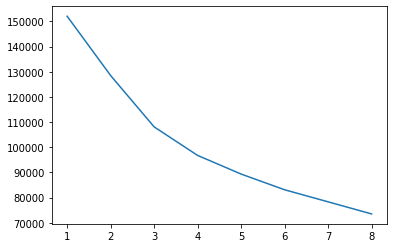

In [22]:
wcss=[]
cl=[1,2,3,4,5,6,7,8]
for k in cl:
    mod=KMeans(k)
    mod.fit(data_sc)
    print(mod.inertia_)
    wcss.append(mod.inertia_)
plt.plot(cl,wcss)

In [23]:
from sklearn.metrics import silhouette_score
sil=[]
cl=[2,3,4,5,6,7,8]
for k in cl:
    mod=KMeans(k)
    mod.fit(data_sc)
    score=silhouette_score(data_sc,mod.labels_)
    print(score)
    sil.append(score)

0.19823332157819581
0.28638482608230215
0.19768534873495078
0.19474933396903993
0.19898890027034125
0.2020740089151399
0.21663183686123597


In [24]:
#use PCA for cluster visual
from sklearn.decomposition import PCA
pca=PCA(2)
pcadata=pca.fit_transform(data_sc)

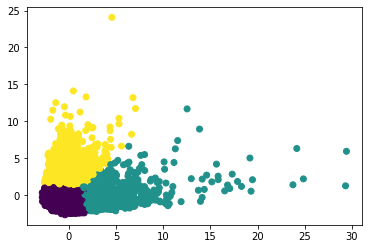

In [25]:
plt.scatter(pcadata[:,0],pcadata[:,1],c=label)

In [26]:
pcadata1=pd.DataFrame(pcadata)
pcadata1['label']=label

In [27]:
cent=pcadata1.groupby('label').mean()
cent

,0,1
label,,
0,-0.664478,-0.821137
1,3.845712,-0.282577
2,-0.514645,3.343107


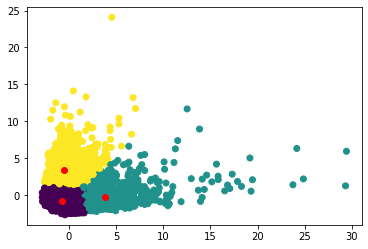

In [28]:
plt.scatter(pcadata1[0],pcadata1[1],c=label)
plt.scatter(cent.iloc[0,0],cent.iloc[0,1],color='red')
plt.scatter(cent.iloc[1,0],cent.iloc[1,1],color='red')
plt.scatter(cent.iloc[2,0],cent.iloc[2,1],color='red')

In [69]:
out=data['Label']
inp=data.drop('Label',1)

In [70]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48,stratify=out)

In [71]:

from sklearn.ensemble import RandomForestClassifier
rf_mod=RandomForestClassifier()
rf_mod.fit(xtrain,ytrain)
ypred=rf_mod.predict(xtest)

In [73]:
from sklearn.metrics import classification_report,cohen_kappa_score
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1759
           1       0.95      0.93      0.94       363
           2       0.96      0.94      0.95       469

    accuracy                           0.97      2591
   macro avg       0.96      0.95      0.96      2591
weighted avg       0.97      0.97      0.97      2591



In [74]:
cohen_kappa_score(ytest,ypred)

0.9361172031120365

In [33]:
from sklearn.datasets import make_moons
moons, moon_labels = make_moons(n_samples=500, noise=.05)

In [34]:
db_data=pd.DataFrame()
db_data['F1']=moons[:,0]
db_data['F2']=moons[:,1]
db_data['out']=moon_labels

In [35]:
db_data.to_csv('db_data.csv')

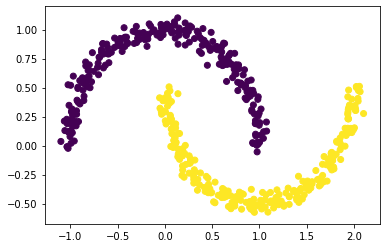

In [36]:
plt.scatter(moons[:,0],moons[:,1],c=moon_labels)

In [48]:
db_data=pd.read_csv('db_data.csv')
lab=db_data['out']

In [49]:
db_data.head(2)

,F1,F2,out
0,-0.914217,0.206889,0
1,0.933988,0.018113,0


In [50]:
db_data=db_data.drop('out',axis=1)

In [51]:
from sklearn.cluster import KMeans
mod2=KMeans(n_clusters=2)
mod2.fit(db_data)
labels=mod2.labels_
cent=mod2.cluster_centers_

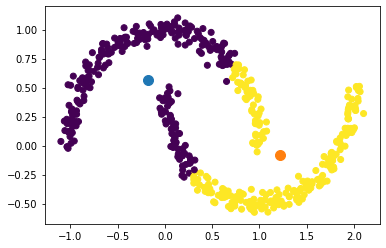

In [52]:
from matplotlib import pyplot as plt
plt.scatter(db_data.iloc[:,0],db_data.iloc[:,1],c=labels)
plt.scatter(cent[0,0],cent[0,1],s=100)
plt.scatter(cent[1,0],cent[1,1],s=100)


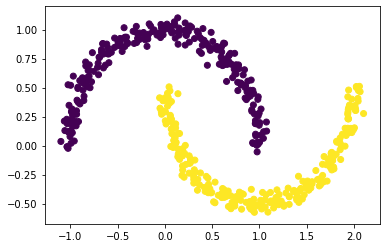

In [53]:
from sklearn.cluster import DBSCAN
db_mod = DBSCAN(eps=0.3)
db_mod.fit(db_data)
lab_db=db_mod.labels_
plt.scatter(db_data.iloc[:,0],db_data.iloc[:,1],c=lab_db)

In [87]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

In [77]:
samp=np.array([[0.40,0.53],[0.22,0.38],[0.35,0.32],[0.26,0.19],[0.08,0.41],[0.45,0.3]])
samp

array([[0.4 , 0.53],
       [0.22, 0.38],
       [0.35, 0.32],
       [0.26, 0.19],
       [0.08, 0.41],
       [0.45, 0.3 ]])

In [78]:
from scipy.spatial.distance import pdist
pdist(samp)

array([0.23430749, 0.21587033, 0.36769553, 0.34176015, 0.23537205,
       0.14317821, 0.19416488, 0.14317821, 0.24351591, 0.15811388,
       0.28460499, 0.10198039, 0.28425341, 0.21954498, 0.38600518])

In [79]:
link_matrix = linkage(samp, 'single')
link_matrix

array([[2.        , 5.        , 0.10198039, 2.        ],
       [1.        , 6.        , 0.14317821, 3.        ],
       [4.        , 7.        , 0.14317821, 4.        ],
       [3.        , 8.        , 0.15811388, 5.        ],
       [0.        , 9.        , 0.21587033, 6.        ]])

{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [15.0, 15.0, 33.75, 33.75],
  [5.0, 5.0, 24.375, 24.375]],
 'dcoord': [[0.0, 0.10198039027185574, 0.10198039027185574, 0.0],
  [0.0, 0.1431782106327635, 0.1431782106327635, 0.10198039027185574],
  [0.0, 0.14317821063276354, 0.14317821063276354, 0.1431782106327635],
  [0.0, 0.15811388300841894, 0.15811388300841894, 0.14317821063276354],
  [0.0, 0.21587033144922904, 0.21587033144922904, 0.15811388300841894]],
 'ivl': ['0', '3', '4', '1', '2', '5'],
 'leaves': [0, 3, 4, 1, 2, 5],
 'color_list': ['g', 'g', 'g', 'b', 'b']}

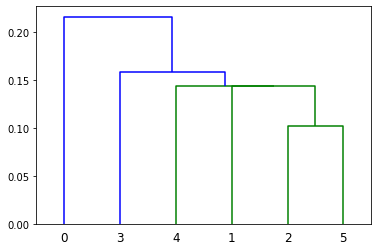

In [80]:
dendrogram(link_matrix)

In [81]:
c, coph_dists = cophenet(link_matrix, pdist(samp))
c

0.44512293520805063

In [92]:
clusters = fcluster(link_matrix, 0.15, criterion='distance')
clusters

array([3, 1, 1, 2, 1, 1], dtype=int32)

In [101]:
data_sc=data_sc.drop('Label',1)

In [83]:
linkage_matrix = linkage(data_sc, 'ward')

In [84]:
link=pd.DataFrame(linkage_matrix)
#link.head(50)

In [11]:
#print(data_sc.iloc[4212,:])
#print(data_sc.iloc[6147,:])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [105.0, 105.0, 123.75, 123.75],
  [82.5, 82.5, 114.375, 114.375],
  [28.125, 28.125, 98.4375, 98.4375],
  [155.0, 155.0, 165.0, 165.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [222.5, 222.5, 250.0, 250.0],
  [183.75, 183.75, 236.25, 236.25],
  [160.0, 160.0, 210.0, 210.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [355.0, 355.0, 365.0, 365.0],
  [385.0, 385.0,

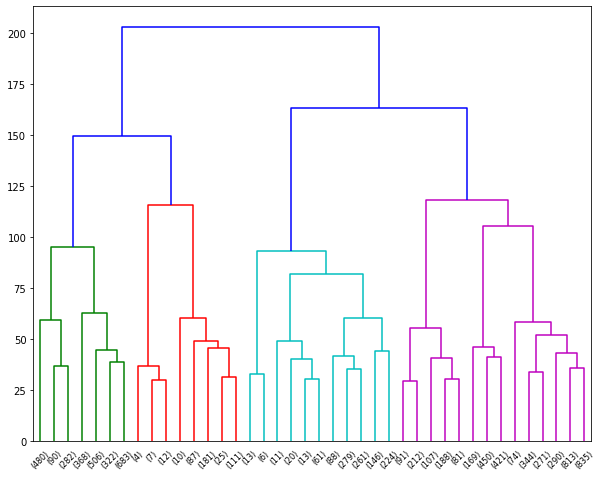

In [85]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
dendrogram(linkage_matrix,truncate_mode='lastp',p=40)

In [15]:
mod=AgglomerativeClustering(4)
mod.fit(data_sc)
lab1=mod.labels_

In [16]:
lab1=pd.DataFrame(lab1)


In [17]:
lab1[0].value_counts()

0    4346
3    2731
2    1122
1     437
Name: 0, dtype: int64

In [18]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(linkage_matrix, pdist(data_sc))
c

0.35214260963112154

In [93]:
clusters = fcluster(linkage_matrix, 125, criterion='distance')
clusters

array([4, 3, 1, ..., 4, 4, 4], dtype=int32)

In [94]:
clusters=pd.DataFrame(clusters)

In [96]:
clusters[0].value_counts()

4    4346
1    2731
3    1122
2     437
Name: 0, dtype: int64

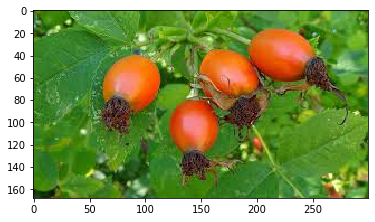

In [226]:
img=plt.imread('img.jpg')
plt.figure()
plt.imshow(img)

In [249]:
x,y,z=img.shape
img1=img.reshape(x*y,z)

In [250]:
img1.shape

(50400, 3)

In [251]:
clust=KMeans(n_clusters=2,random_state=0)
clust.fit(img1)
cent=clust.cluster_centers_
lab=clust.labels_

In [252]:
lab[:5]

array([0, 0, 0, 0, 0])

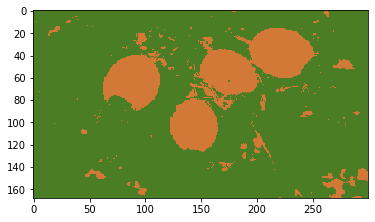

In [253]:
seg=cent[lab].reshape(x,y,z)
plt.imshow(seg.astype(np.uint8))

In [254]:
seg[seg==cent[0]]=0
seg[seg==cent[1]]=1

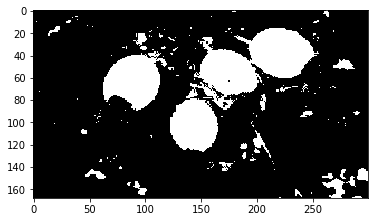

In [255]:
plt.imshow(seg)

In [232]:
import numpy as np
from numpy.linalg import eig
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


In [233]:
M = np.mean(A, axis=0)
print(M)

[3. 4.]


In [234]:
C = A - M
print(C)

[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


In [235]:
V = np.cov(C.T)
print(V)

[[4. 4.]
 [4. 4.]]


In [236]:
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]


In [172]:
P = vectors.T.dot(C.T)
print(P.T)

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


In [173]:
from sklearn.decomposition import PCA
pca=PCA(2)
pcadata=pca.fit_transform(A)
pcadata

array([[-2.82842712,  0.        ],
       [ 0.        ,  0.        ],
       [ 2.82842712,  0.        ]])

In [174]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [175]:
pca.explained_variance_

array([8., 0.])

In [176]:
pca.explained_variance_ratio_

array([1., 0.])

In [237]:
data_sc.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.744625,-0.370047,-0.429184,-0.35916,-0.354826,-0.468655,-0.820769,-0.68628,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
C10002,0.764152,0.067679,-0.473208,-0.35916,-0.458839,2.568556,-1.236139,-0.68628,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181


In [238]:
data_sc.shape

(8636, 17)

In [239]:
from sklearn.decomposition import PCA
pca=PCA(17)
pcadata=pca.fit_transform(data_sc)

In [242]:
ex_ratio=pd.DataFrame(pca.explained_variance_ratio_).round(2)
ex_ratio

,0
0,0.27
1,0.20
2,0.09
3,0.08
4,0.06
5,0.06
6,0.05
7,0.04
8,0.04
9,0.03


In [137]:
ex_ratio[0].head(10).sum()

0.92

In [245]:
pca10=pcadata[:,:10]

In [246]:
pca10.shape

(8636, 10)

In [247]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(pca10,out,test_size=0.3,random_state=48,stratify=out)
from sklearn.ensemble import RandomForestClassifier
rf_mod=RandomForestClassifier()
rf_mod.fit(xtrain,ytrain)
ypred=rf_mod.predict(xtest)

In [157]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1759
           1       0.97      0.98      0.97       363
           2       0.98      0.99      0.98       469

    accuracy                           0.99      2591
   macro avg       0.98      0.98      0.98      2591
weighted avg       0.99      0.99      0.99      2591



In [248]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48,stratify=out)
from sklearn.ensemble import RandomForestClassifier
rf_mod=RandomForestClassifier()
rf_mod.fit(xtrain,ytrain)
ypred=rf_mod.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1759
           1       0.95      0.93      0.94       363
           2       0.95      0.96      0.95       469

    accuracy                           0.97      2591
   macro avg       0.96      0.96      0.96      2591
weighted avg       0.97      0.97      0.97      2591

